In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from loader import load_news_data
import matplotlib.pyplot as plt
import seaborn as sns
import talib             
import pynance as py  
import quantstats as qs 
import numpy as np
import pandas as pd


df = load_news_data('../data/META.csv')
print(df.head())
print(df.columns)

Loading data from ../data/META.csv...
         Date      Close       High        Low       Open     Volume
0  2012-05-18  37.995762  44.724282  37.767172  41.792356  573576400
1  2012-05-21  33.821495  36.435382  32.797807  36.306177  168192700
2  2012-05-22  30.810066  33.384198  30.750434  32.410203  101786600
3  2012-05-23  31.803938  32.300874  31.167860  31.177799   73600000
4  2012-05-24  32.827625  33.006523  31.575347  32.748117   50237200
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [2]:
# Clean stock data

# Remove rows with missing values
data = df.dropna()

# Ensure correct data types
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)

         count          mean           std           min           25%  \
Close   2923.0  1.567274e+02  9.036877e+01  1.762137e+01  8.027512e+01   
High    2923.0  1.586905e+02  9.147074e+01  1.815806e+01  8.097084e+01   
Low     2923.0  1.546851e+02  8.922298e+01  1.744247e+01  7.966389e+01   
Open    2923.0  1.566536e+02  9.030883e+01  1.796922e+01  8.027513e+01   
Volume  2923.0  3.060615e+07  2.637157e+07  5.467500e+06  1.633730e+07   

                 50%           75%           max  
Close   1.525794e+02  2.035502e+02  3.798384e+02  
High    1.546367e+02  2.063728e+02  3.819752e+02  
Low     1.507308e+02  2.005487e+02  3.764890e+02  
Open    1.526987e+02  2.029638e+02  3.793414e+02  
Volume  2.295390e+07  3.522740e+07  5.735764e+08  


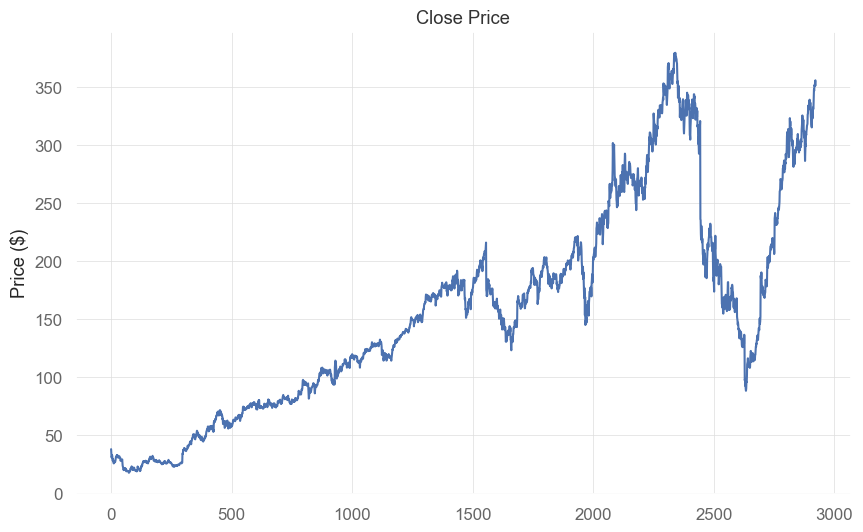

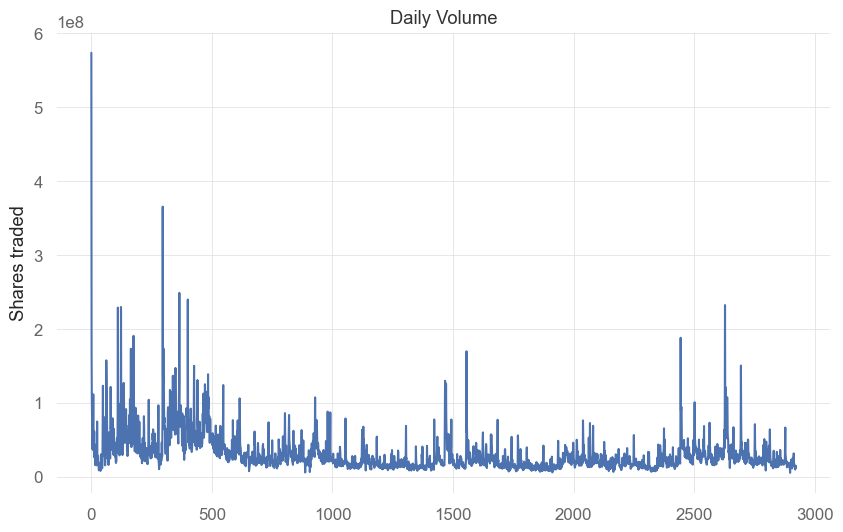

In [3]:
print(data.describe().T)

# Close price chart
data["Close"].plot(title="Close Price")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
data["Volume"].plot(title="Daily Volume")
plt.ylabel("Shares traded")
plt.show()


In [4]:

if "Adj Close" in data.columns:
    price = data["Adj Close"]
else:
    price = data["Close"]

# --- Moving Averages ---
data["SMA_20"] = talib.SMA(price, timeperiod=20)
data["SMA_50"] = talib.SMA(price, timeperiod=50)
data["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
data["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
data["MACD"], data["MACD_signal"], data["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)



data.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
2918,2023-12-22,351.224823,355.011477,349.068105,353.401377,11772800.0,332.302945,323.317843,335.581703,67.333885,6.945367,4.729907,2.215461
2919,2023-12-26,352.655975,354.792827,351.284456,352.814999,9898600.0,333.303278,324.115724,337.207824,68.187000,7.436800,5.271285,2.165514
2920,2023-12-27,355.637543,356.800387,353.132994,353.888347,13207900.0,334.239505,324.844828,338.963036,69.947874,7.974921,5.812012,2.162908
2921,2023-12-28,356.124634,359.682686,355.617749,357.496184,11798800.0,335.537503,325.527023,340.597473,70.237702,8.344500,6.318510,2.025990
2922,2023-12-29,351.791290,357.794292,349.664418,356.790470,14987100.0,336.869788,326.262290,341.663551,64.296803,8.193282,6.693464,1.499818


In [5]:
from pynance import portfolio_optimizer as po

TICKERS = ["META", "AMZN","GOOG","MSFT", "AAPL", "NVDA"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())

c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is depr

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  61.96%
Standard Deviation               35.59%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
META            0.00%
AMZN            0.00%
GOOG           47.22%
MSFT            0.00%
AAPL            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.17%
Standard Deviation            20.03%

=== Min Variance Portfolio weights ===
     Portfolio Weight
META            0.98%
AMZN            0.00%
GOOG           15.39%
MSFT           47.22%
AAPL           36.41%


Price & Moving Averages


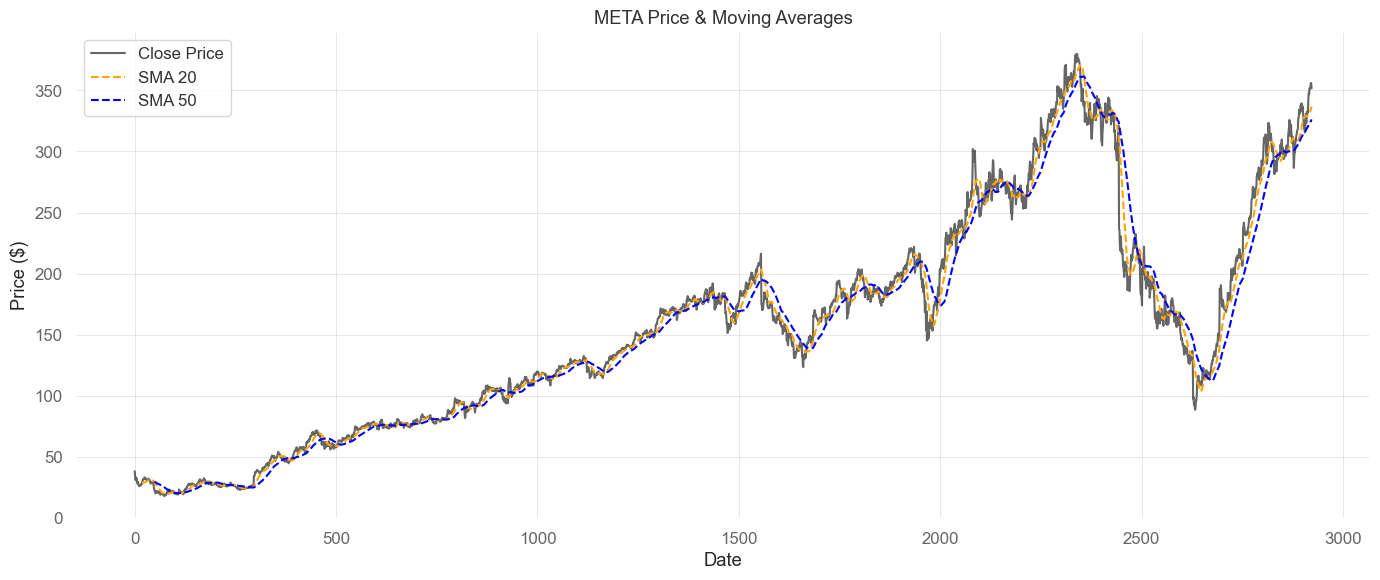

In [6]:

print("Price & Moving Averages")
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='blue', linestyle='--')

plt.title('META Price & Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

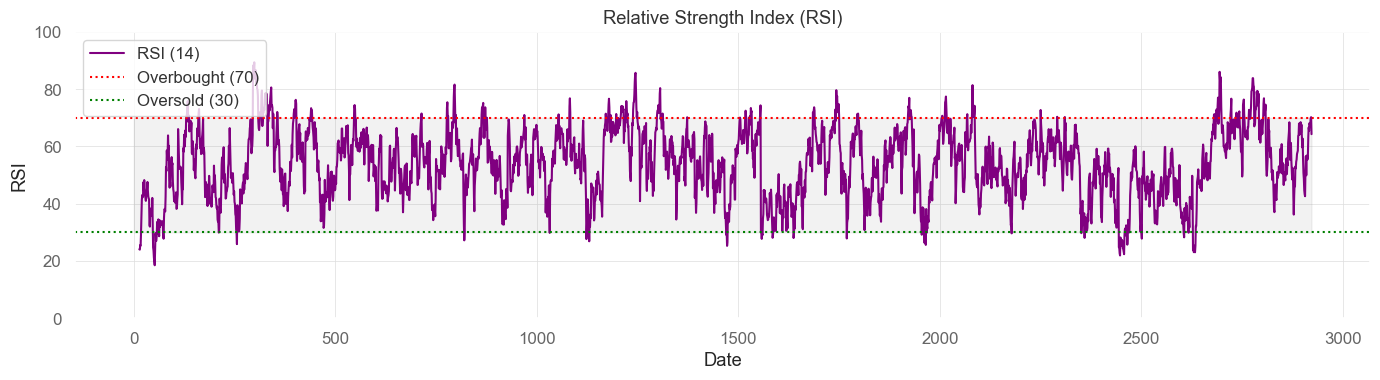

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(data.index, data['RSI_14'], label='RSI (14)', color='purple')

# Add thresholds
plt.axhline(70, color='red', linestyle=':', label='Overbought (70)')
plt.axhline(30, color='green', linestyle=':', label='Oversold (30)')
plt.fill_between(data.index, 70, 30, color='gray', alpha=0.1)

plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Subplot 3: MACD


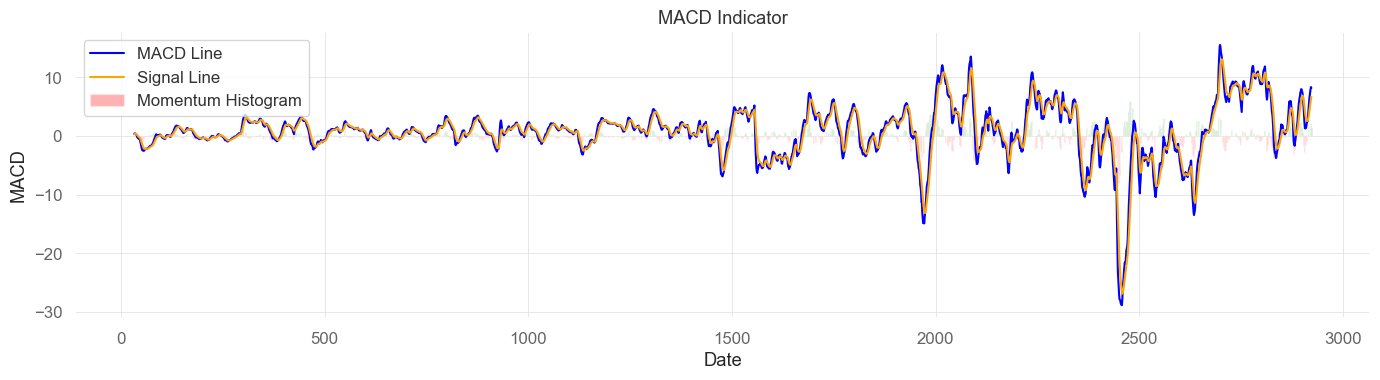

In [8]:
print("Subplot 3: MACD")

plt.figure(figsize=(14, 4))
plt.plot(data.index, data['MACD'], label='MACD Line', color='blue')
plt.plot(data.index, data['MACD_signal'], label='Signal Line', color='orange')

# Color histogram bars based on value
colors = ['green' if v >= 0 else 'red' for v in data['MACD_hist']]
plt.bar(data.index, data['MACD_hist'], color=colors, alpha=0.3, label='Momentum Histogram')

plt.title('MACD Indicator')
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()